In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.model_selection import cross_validate, train_test_split, GridSearchCV, cross_val_score, RandomizedSearchCV, \
    validation_curve, RepeatedKFold


from sklearn.exceptions import ConvergenceWarning
from sklearn.linear_model import LinearRegression

from sklearn.svm import SVR
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
import joblib

from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import statsmodels.api as sm
from time import time

In [2]:
df=pd.read_csv("d_encoded.csv")

In [4]:
df.drop(["Unnamed: 0"], axis=1, inplace=True)
df.head()

,LEVEL,EXPERIENCE,SALARY_AVG_TL,POSITION_CTO,POSITION_DATA SCIENTIST,POSITION_DATABASE ADMIN,POSITION_DEVOPS ENGINEER,POSITION_EMBEDDED SOFTWARE DEVELOPER,POSITION_FRONT-END DEVELOPER,POSITION_FULL STACK DEVELOPER,...,COMPANY_Startup,COMPANY_Yazılım & Teknoloji,WORK_TYPE_Geçici Remote,WORK_TYPE_Hibrit,WORK_TYPE_Ofis,WORK_TYPE_Remote,CITY_yurt_ici,CURRENCY_£ - Sterlin,CURRENCY_€ - Euro,CURRENCY_₺ - Türk Lirası
0,1,2,15499,0,0,0,0,0,0,0,...,1,0,0,1,0,0,1,0,0,1
1,0,0,8499,0,0,0,0,0,1,0,...,1,0,0,1,0,0,1,0,0,1
2,1,1,15499,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,1
3,0,1,10499,0,0,0,0,0,0,1,...,1,0,0,1,0,0,1,0,0,1
4,0,0,5499,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5026 entries, 0 to 5025
Data columns (total 34 columns):
 #   Column                                   Non-Null Count  Dtype
---  ------                                   --------------  -----
 0   LEVEL                                    5026 non-null   int64
 1   EXPERIENCE                               5026 non-null   int64
 2   SALARY_AVG_TL                            5026 non-null   int64
 3   POSITION_CTO                             5026 non-null   int64
 4   POSITION_DATA SCIENTIST                  5026 non-null   int64
 5   POSITION_DATABASE ADMIN                  5026 non-null   int64
 6   POSITION_DEVOPS ENGINEER                 5026 non-null   int64
 7   POSITION_EMBEDDED SOFTWARE DEVELOPER     5026 non-null   int64
 8   POSITION_FRONT-END DEVELOPER             5026 non-null   int64
 9   POSITION_FULL STACK DEVELOPER            5026 non-null   int64
 10  POSITION_GAME DEVELOPER                  5026 non-null   int64
 11  POSI

In [6]:
#Bagımlı ve bagımsız degiskenlerimizi ayırıyoruz
y = df["SALARY_AVG_TL"]
X = df.drop(["SALARY_AVG_TL"], axis=1)

In [7]:
# Veri setini train (%80) ve test (%20) şeklinde iki parçaya ayır.
# Her çalıştırdığımızda aynı değerleri almak için random_state değerini set ettik.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [8]:
# Modelimizi kuralım
reg_model = LinearRegression().fit(X_train, y_train)

In [9]:
# Train RMSE
y_pred = reg_model.predict(X_train)
np.sqrt(mean_squared_error(y_train, y_pred))

17513.40975912417

In [13]:
# TRAIN R-KARE
reg_model.score(X_train, y_train)

0.6480912265966021

In [10]:
# Test RMSE; Train seti üzerinden kurduğumuz modeli test seti üzerinde kullanıp ort hata miktarına bakıyoruz
y_pred = reg_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

17942.86752379957

In [14]:
# Test R-KARE
reg_model.score(X_test, y_test)

0.6301126594756647

In [15]:
# 10 Katlı CV RMSE
np.mean(np.sqrt(-cross_val_score(reg_model,
                                 X,
                                 y,
                                 cv=10,
                                 scoring="neg_mean_squared_error"))) #scoring="neg_mean_squared_error" eksi degerler gelecegi icin ilk basta eksiyle carptık ki artı olsun


2.689889775083312e-13

In [16]:
y_test

3489      5499
2070      7499
1875      5499
1971     15499
3536    204425
         ...  
4707      6499
791      25499
4853     11499
1438      6499
301       6499
Name: SALARY_AVG_TL, Length: 1006, dtype: int64

In [17]:
veri=np.array(y_test)
veri
dff=pd.DataFrame(data=veri, columns=["y_test"])
dff
dff["y_pred"]=  pd.DataFrame(y_pred,columns = ["y_pred"])
dff.head(20)

,y_test,y_pred
0,5499,8369.616816
1,7499,9335.235243
2,5499,9529.622692
3,15499,16477.861301
4,204425,86845.080648
5,35499,45586.744322
6,11499,15856.478487
7,16499,17590.279843
8,27499,18550.816001
9,8499,11021.782616


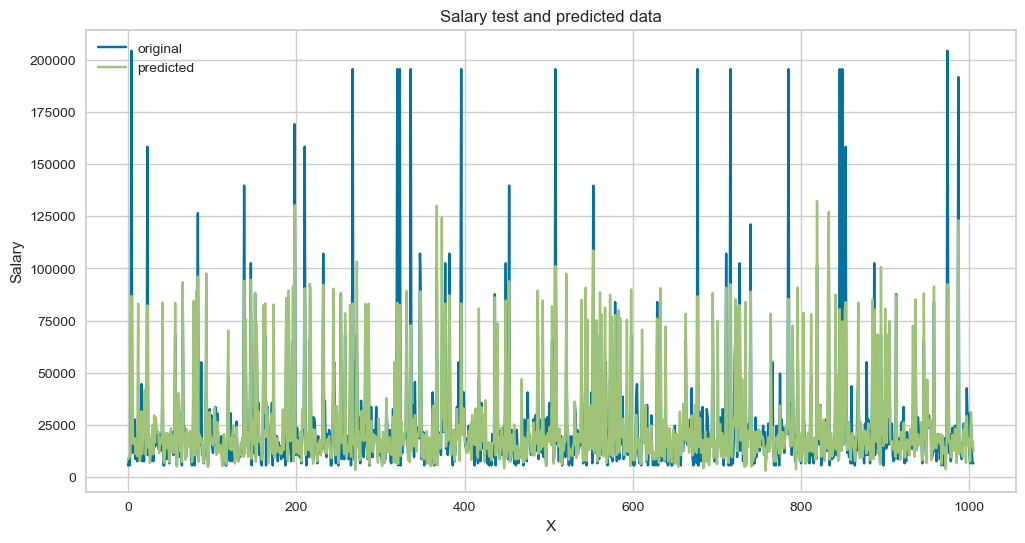

In [20]:
#BU GRAFİKTE Y_TEST'TEKİ DEGERLER VE BUNLARIN TAHMİNLERİ VAR
x_ax = range(len(y_test))
plt.figure(figsize=(12, 6))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, y_pred, label="predicted")
plt.title("Salary test and predicted data")
plt.xlabel('X')
plt.ylabel('Salary')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

In [ ]:
reg_model = LinearRegression().fit(X, y)

In [ ]:
y_pred_all=reg_model.predict(X)

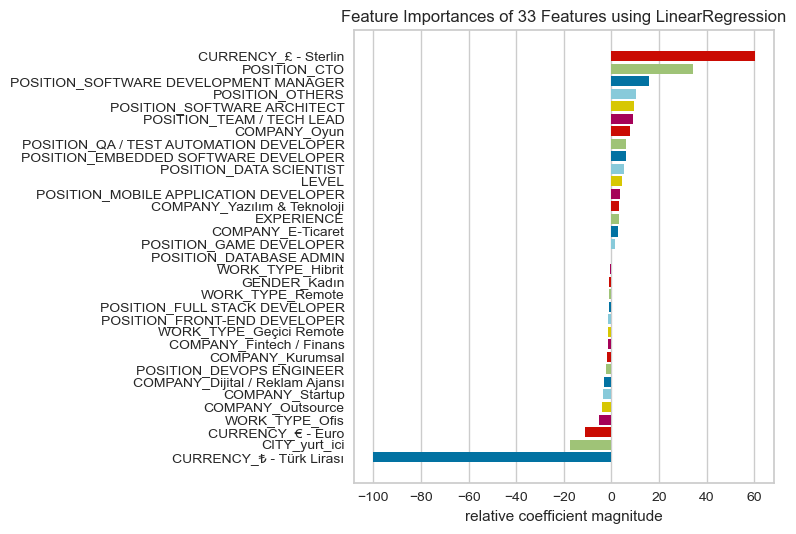

FeatureImportances(ax=<AxesSubplot:title={'center':'Feature Importances of 33 Features using LinearRegression'}, xlabel='relative coefficient magnitude'>,
                   estimator=LinearRegression())

In [11]:
from yellowbrick.model_selection import feature_importances

# Use the quick method and immediately show the figure
feature_importances(LinearRegression(), X, y)

Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: -0.00000
Feature: 3, Score: -0.00000
Feature: 4, Score: 9.07425
Feature: 5, Score: -0.00000
Feature: 6, Score: 40.83954
Feature: 7, Score: -0.00000
Feature: 8, Score: 0.00000
Feature: 9, Score: -0.00000
Feature: 10, Score: -0.00000
Feature: 11, Score: 94.58986
Feature: 12, Score: -0.00000
Feature: 13, Score: 0.00000
Feature: 14, Score: 11.32919
Feature: 15, Score: 78.41110
Feature: 16, Score: -0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: -0.00000
Feature: 19, Score: 99.37359
Feature: 20, Score: 19.23576
Feature: 21, Score: 0.00000
Feature: 22, Score: -0.00000
Feature: 23, Score: 95.23892
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 20.06292
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00000
Feature: 31, Score: 2.05828
Feature: 32, Score: 0.00000


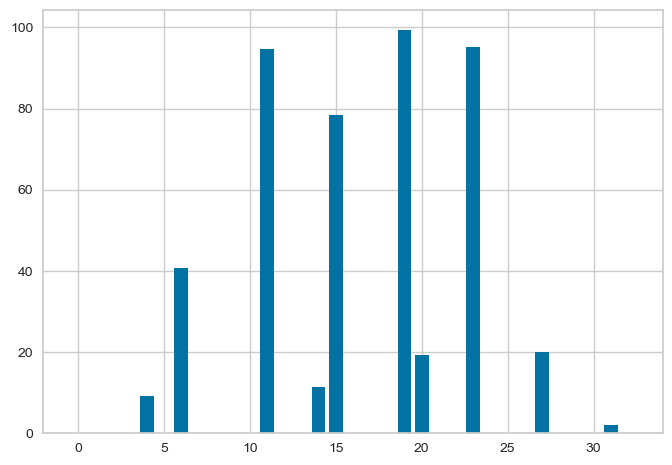

In [12]:
# linear regression feature importance
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot
# define dataset
X, y = make_regression(n_samples=1000, n_features=33, n_informative=10, random_state=1)
# define the model
model = LinearRegression()
# fit the model
model.fit(X, y)
# get importance
importance = model.coef_
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [21]:
#model dosyası olusturalım

In [22]:
# Modeli dosya şeklinde diske kaydedelim
joblib.dump(reg_model, "reg_model.pkl")

['reg_model.pkl']

In [23]:
# Şimdi de bu dosyayı okuyalım
reg_model_from_disc = joblib.load("reg_model.pkl")